Tutorial - Part #1 - The SingleImage Class
==========================================

In this first tutorial the basics of the methods and properties of the
SingleImage class are explained.

This object class represents the basic unit of data which we will manipulate.
Basically it starts containing pixel data, with its mask.
First lets create an instance of this class with a numpy array.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from properimage import single_image as s

%matplotlib inline

In [2]:
pixel = np.random.random((128,128))*5.
# Add some stars to it
star = [[35, 38, 35],
        [38, 90, 39],
        [35, 39, 34]]
for i in range(25):
    x, y = np.random.randint(120, size=2)
    pixel[x:x+3,y:y+3] = star

mask = np.random.randint(2, size=(128,128)) 
for i in range(10):
    mask = mask & np.random.randint(2, size=(128,128))
    
img  = s.SingleImage(pixel, mask)

We can see that the `img` object created automatically produces an output
displaying the number of sources found.  
This just accounts for sources good enough for PSF estimation, which is
the first step for any processing `ProperImage` is intended for.

If we try to print the instance, (or obtain the representation output) we find
that the explicit origin of the data is being displayed

In [3]:
print(img)

SingleImage instance for ndarray


If you would like to acces the data inside the object `img` just ask for `data`.

In [4]:
img.data

masked_array(
  data=[[4.05117654800415, 2.3367366790771484, 3.358428478240967, ...,
         2.9861879348754883, 2.9639270305633545, 2.42071795463562],
        [0.7913976907730103, 0.396319717168808, 4.990025997161865, ...,
         2.640835762023926, 0.19548970460891724, 4.581973075866699],
        [0.21659301221370697, 3.309115409851074, 3.2671613693237305, ...,
         0.602097749710083, 1.2853821516036987, 4.894009113311768],
        ...,
        [3.6120381355285645, 0.2359519749879837, 4.402842998504639, ...,
         3.145235300064087, 1.6198410987854004, 4.595581531524658],
        [1.655808687210083, 2.216202735900879, 2.922168254852295, ...,
         4.323221206665039, 4.086019515991211, 4.8711090087890625],
        [1.7609387636184692, 4.972808837890625, 2.632087469100952, ...,
         3.8503310680389404, 0.36555567383766174, 1.0644891262054443]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [Fals

As can be seen it is a numpy masked array, with bad pixels flagged.

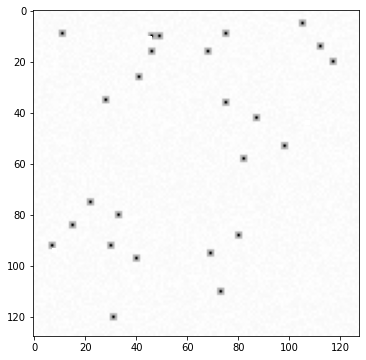

In [5]:
plt.figure(figsize=(6,6))
plt.imshow(img.data, cmap='Greys')

We can check the best sources extracted.

In [6]:
img.best_sources[['x', 'y', 'cflux']]

array([(74.99950543,  8.9952085 , 269.88079834),
       (46.00495959, 16.00276395, 268.41549683),
       (67.99847428, 16.00627683, 269.9263916 ),
       (40.99845109, 25.99984788, 268.90808105),
       (28.00398889, 34.99543308, 267.75750732),
       (75.00020406, 36.00161855, 267.00131226),
       (86.99742868, 42.00051015, 268.46685791),
       (98.00059635, 53.01035352, 267.27404785),
       (81.99934787, 58.00604355, 269.30249023),
       (21.99991067, 74.99746784, 268.52197266),
       (32.999547  , 80.00032554, 267.3571167 ),
       (15.00032772, 84.00220434, 268.28329468),
       (80.00352989, 88.00013903, 266.56143188),
       ( 6.99951973, 92.00160289, 265.66516113),
       (30.0013353 , 91.99455509, 266.05792236),
       (40.00159237, 97.00203221, 266.15142822)],
      dtype={'names':['x','y','cflux'], 'formats':['<f8','<f8','<f8'], 'offsets':[56,64,168], 'itemsize':240})

And also obtain the estimation of PSF.

As the PSF may vary across the field, we use the method described in Lauer T. (2002) for spatially variant PSF.  
The methodology returns a series of image-sized coefficients $a_i$ and a series of basis PSF elements $p_i$.

In [7]:
a_fields, psf_basis = img.get_variable_psf()

updating stamp shape to (15,15)
(16, 16) (225, 16)


As in our simple example we don't vary the PSF we obtain only a PSF element, and a `None` coefficient.

In [8]:
len(psf_basis), psf_basis[0].shape

(1, (15, 15))

In [9]:
a_fields

[None]

We may check the looks of the `psf_basis` single element.

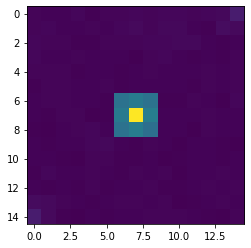

In [10]:
plt.imshow(psf_basis[0])